In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
from sklearn.model_selection import train_test_split
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender,Married,Dependents,Self_Employed,Credit_history,Loan_Amount_Term can be imputed by mode. Loan Amount can be imputed by Mean

In [5]:
mode_cols=['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']
for i in mode_cols:
    df[i]=df[i].fillna(df[i].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Exploratory Data Analysis

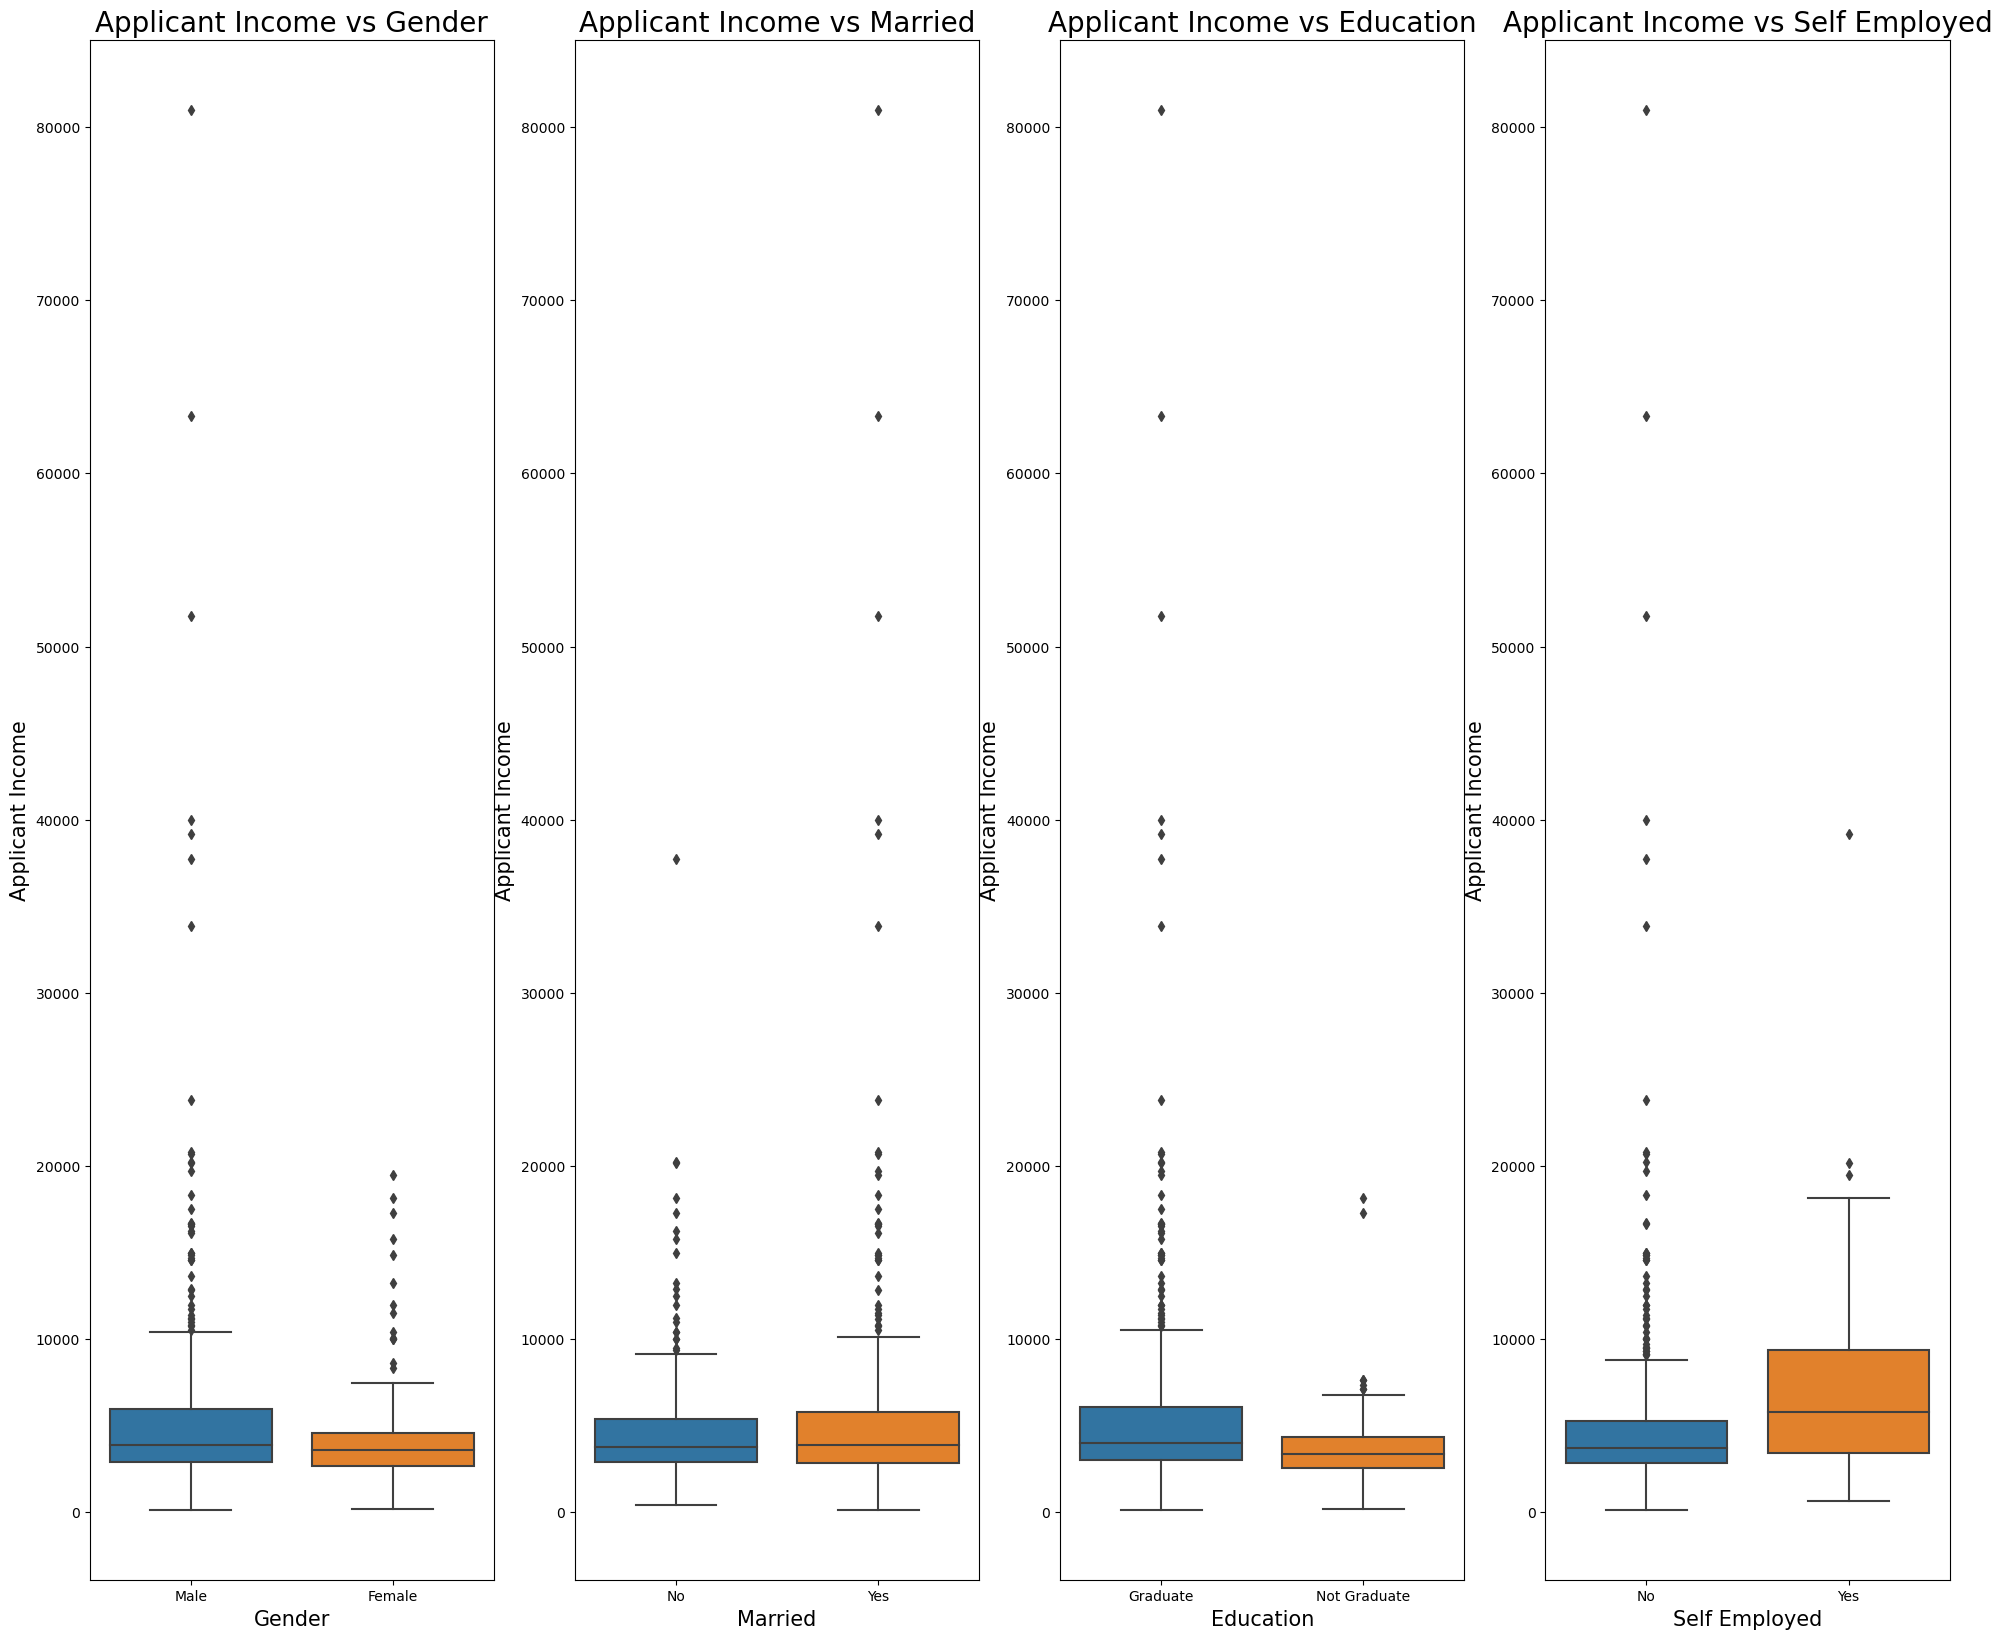

In [11]:
plt.figure(figsize=(24,20))
plt.subplot(1,4,1)
sns.boxplot(x='Gender',y='ApplicantIncome',data=df)
plt.title('Applicant Income vs Gender',fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Applicant Income',fontsize=15)
plt.subplot(1,4,2)
sns.boxplot(x='Married',y='ApplicantIncome',data=df)
plt.title('Applicant Income vs Married',fontsize=20)
plt.xlabel('Married',fontsize=15)
plt.ylabel('Applicant Income',fontsize=15)
plt.subplot(1,4,3)
sns.boxplot(x='Education',y='ApplicantIncome',data=df)
plt.title('Applicant Income vs Education',fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Applicant Income',fontsize=15)
plt.subplot(1,4,4)
sns.boxplot(x='Self_Employed',y='ApplicantIncome',data=df)
plt.title('Applicant Income vs Self Employed',fontsize=20)
plt.xlabel('Self Employed',fontsize=15)
plt.ylabel('Applicant Income',fontsize=15)
plt.show()

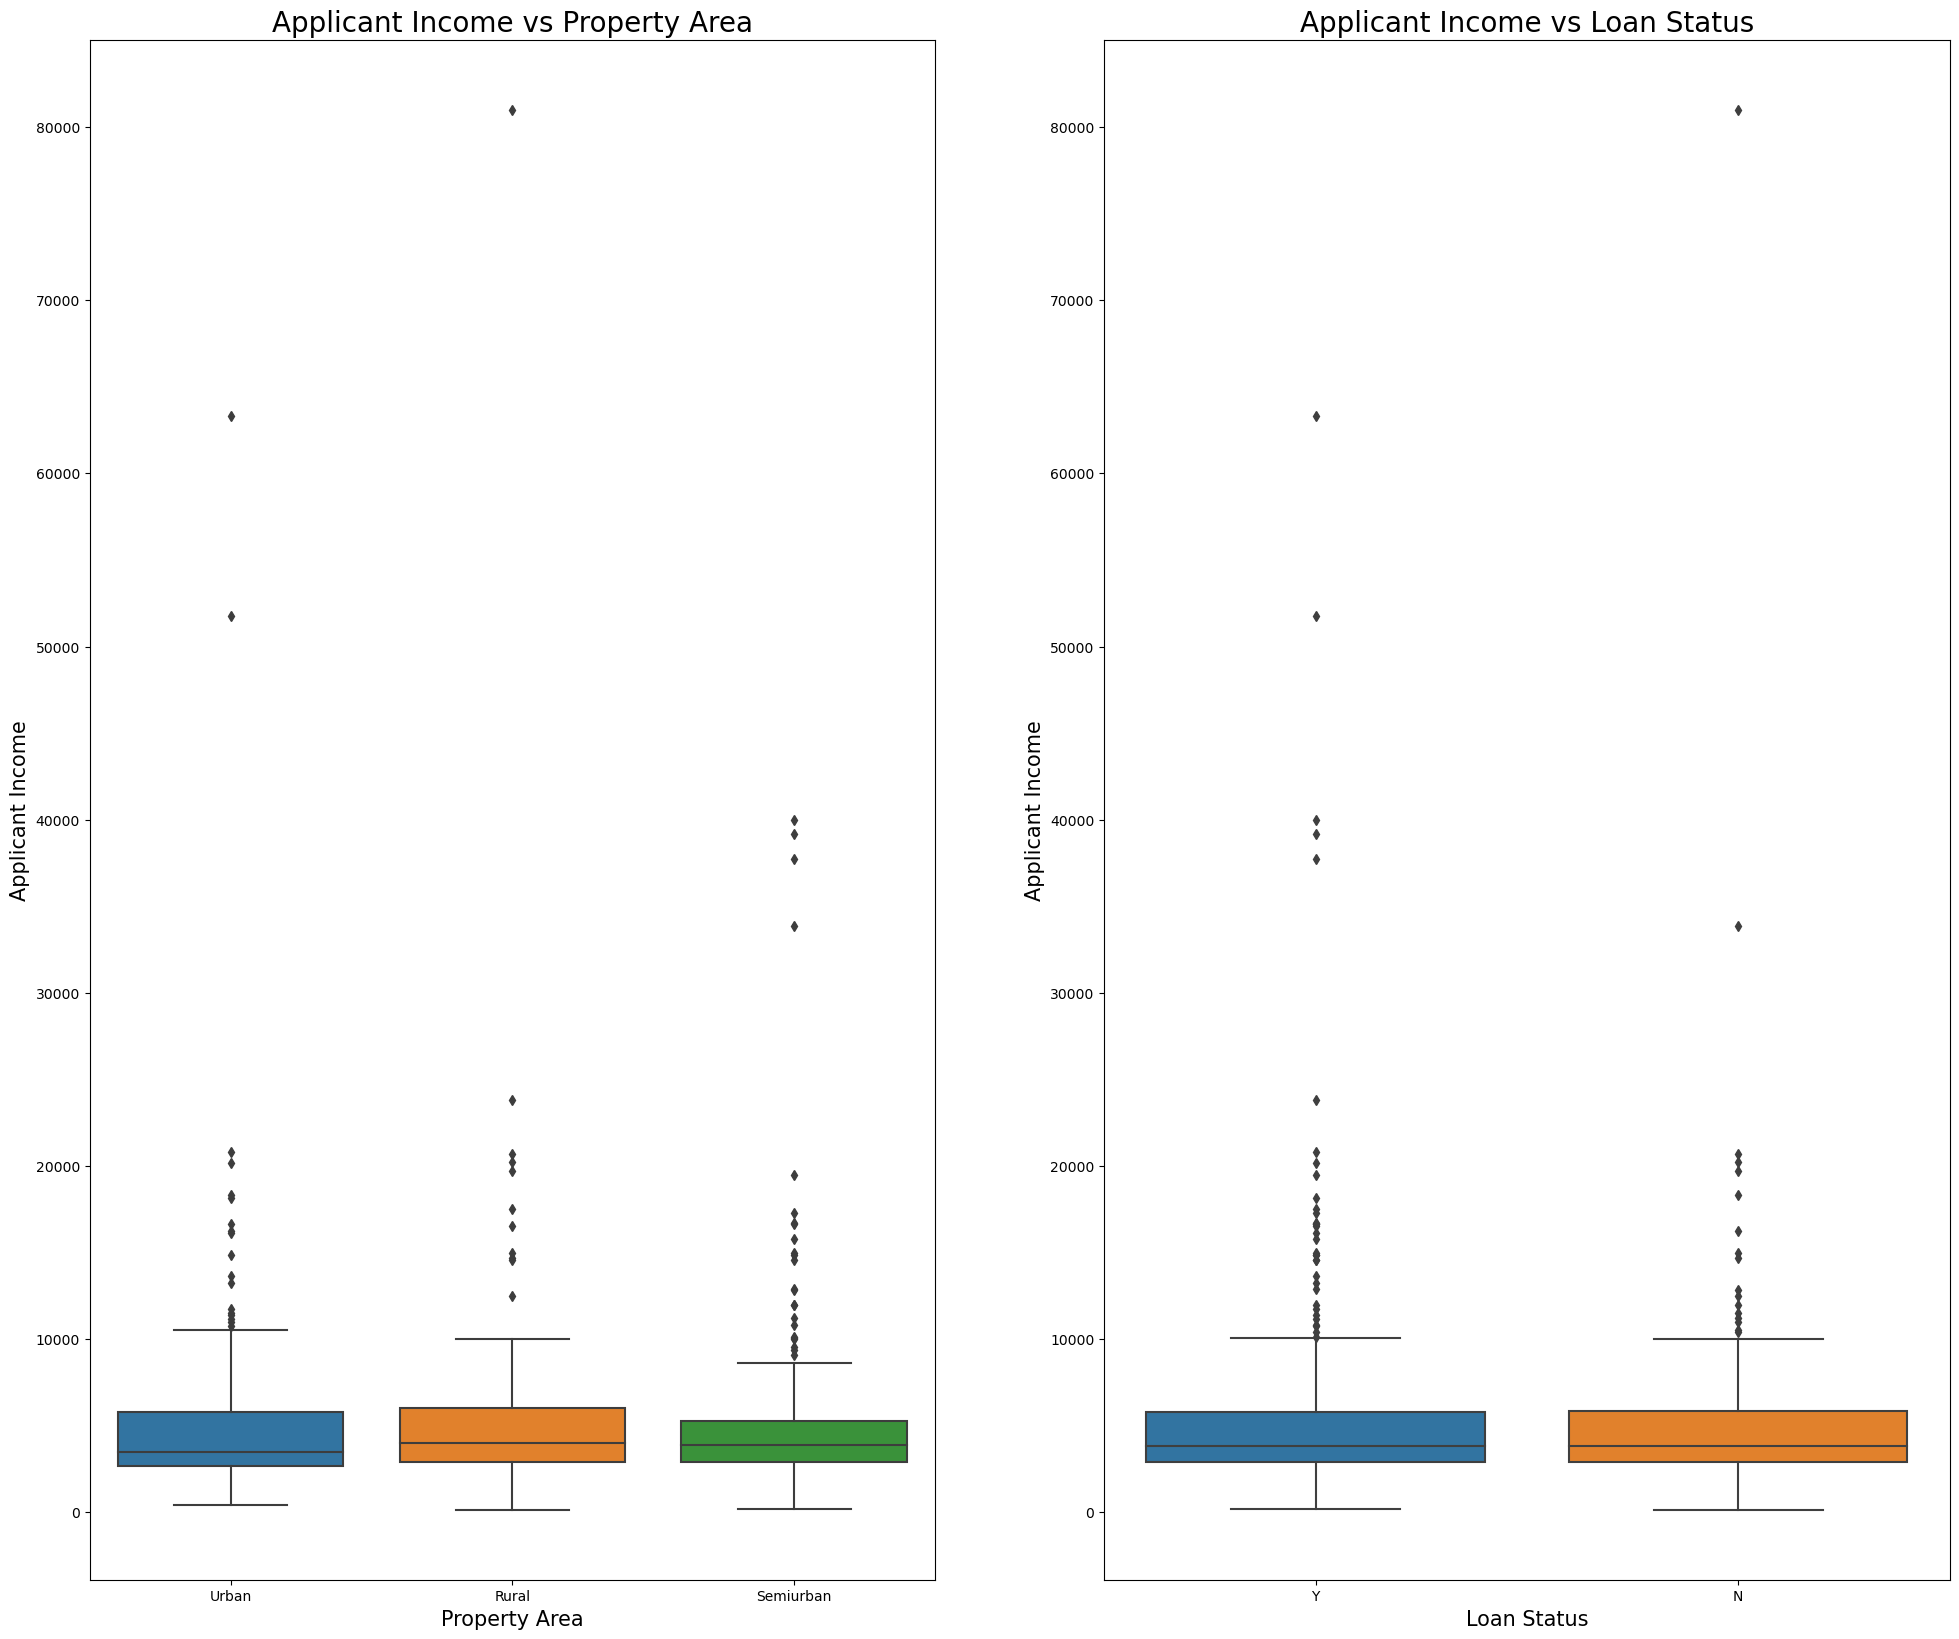

In [15]:
plt.figure(figsize=(24,20))
plt.subplot(1,2,1)
sns.boxplot(x='Property_Area',y='ApplicantIncome',data=df)
plt.title('Applicant Income vs Property Area',fontsize=20)
plt.xlabel('Property Area',fontsize=15)
plt.ylabel('Applicant Income',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)
plt.title('Applicant Income vs Loan Status',fontsize=20)
plt.xlabel('Loan Status',fontsize=15)
plt.ylabel('Applicant Income',fontsize=15)
plt.show()

Inference:
1) No big differences on income based on gender, marriage,education.
2) Self Employed people have higher income compared to those who work for someone else.

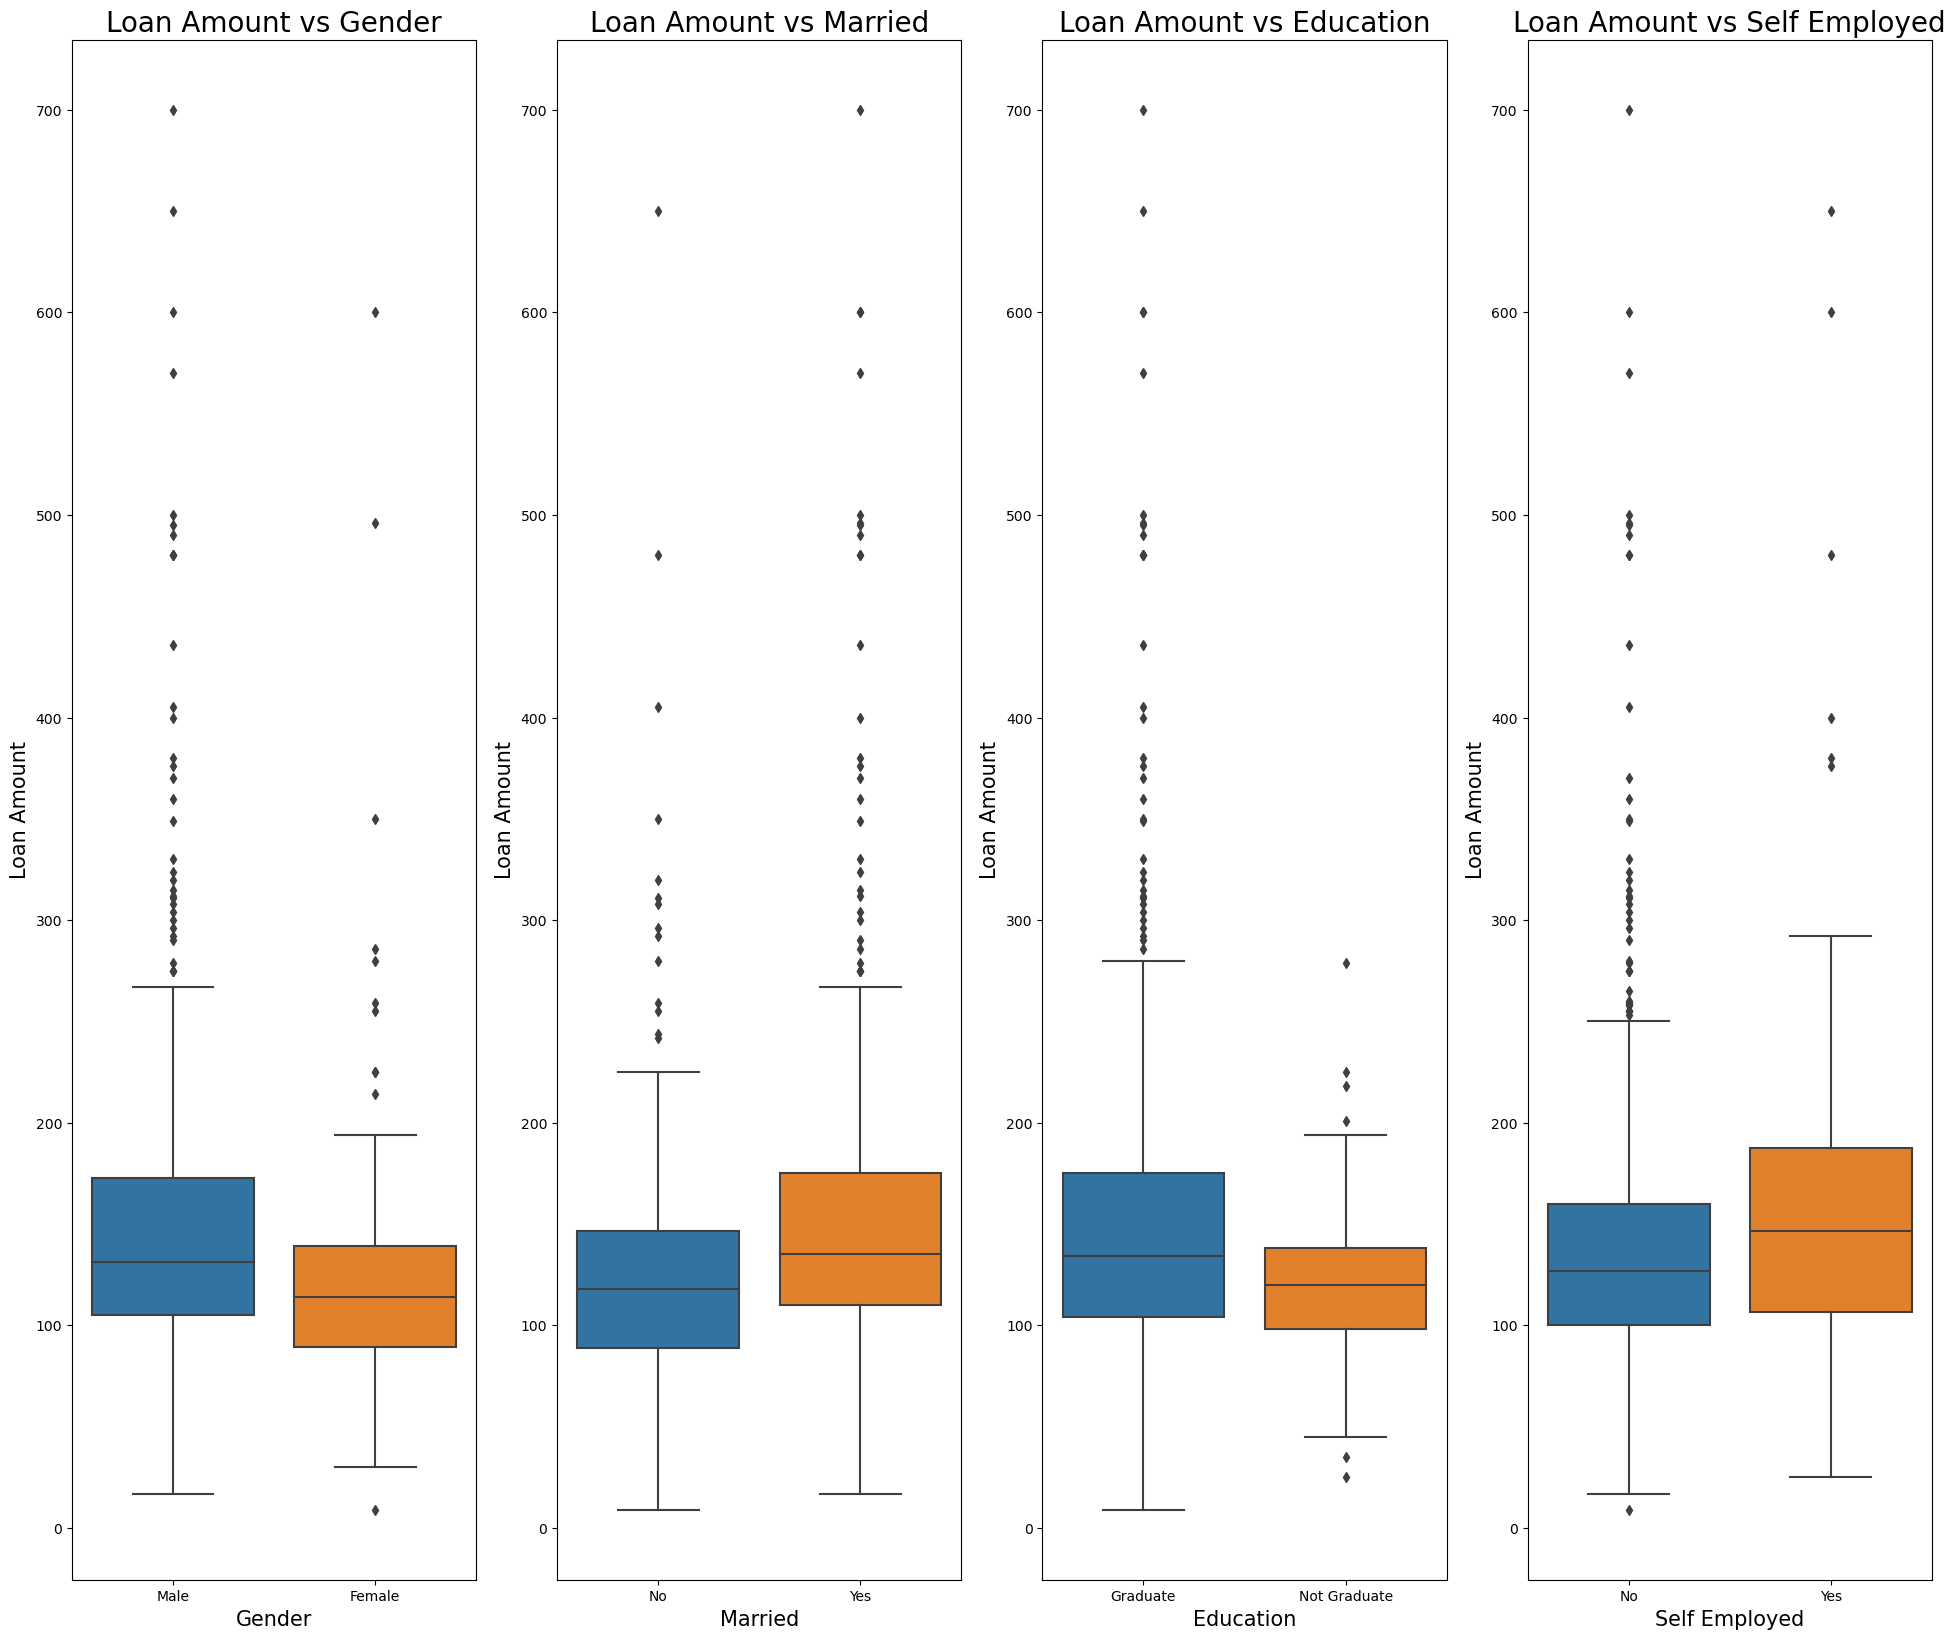

In [12]:
plt.figure(figsize=(24,20))
plt.subplot(1,4,1)
sns.boxplot(x='Gender',y='LoanAmount',data=df)
plt.title('Loan Amount vs Gender',fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,4,2)
sns.boxplot(x='Married',y='LoanAmount',data=df)
plt.title('Loan Amount vs Married',fontsize=20)
plt.xlabel('Married',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,4,3)
sns.boxplot(x='Education',y='LoanAmount',data=df)
plt.title('Loan Amount vs Education',fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,4,4)
sns.boxplot(x='Self_Employed',y='LoanAmount',data=df)
plt.title('Loan Amount vs Self Employed',fontsize=20)
plt.xlabel('Self Employed',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.show()

Inference:
1) Male apply for more loans 
2) Married people apply for more loans
3) Graduate and self employed apply for more loans

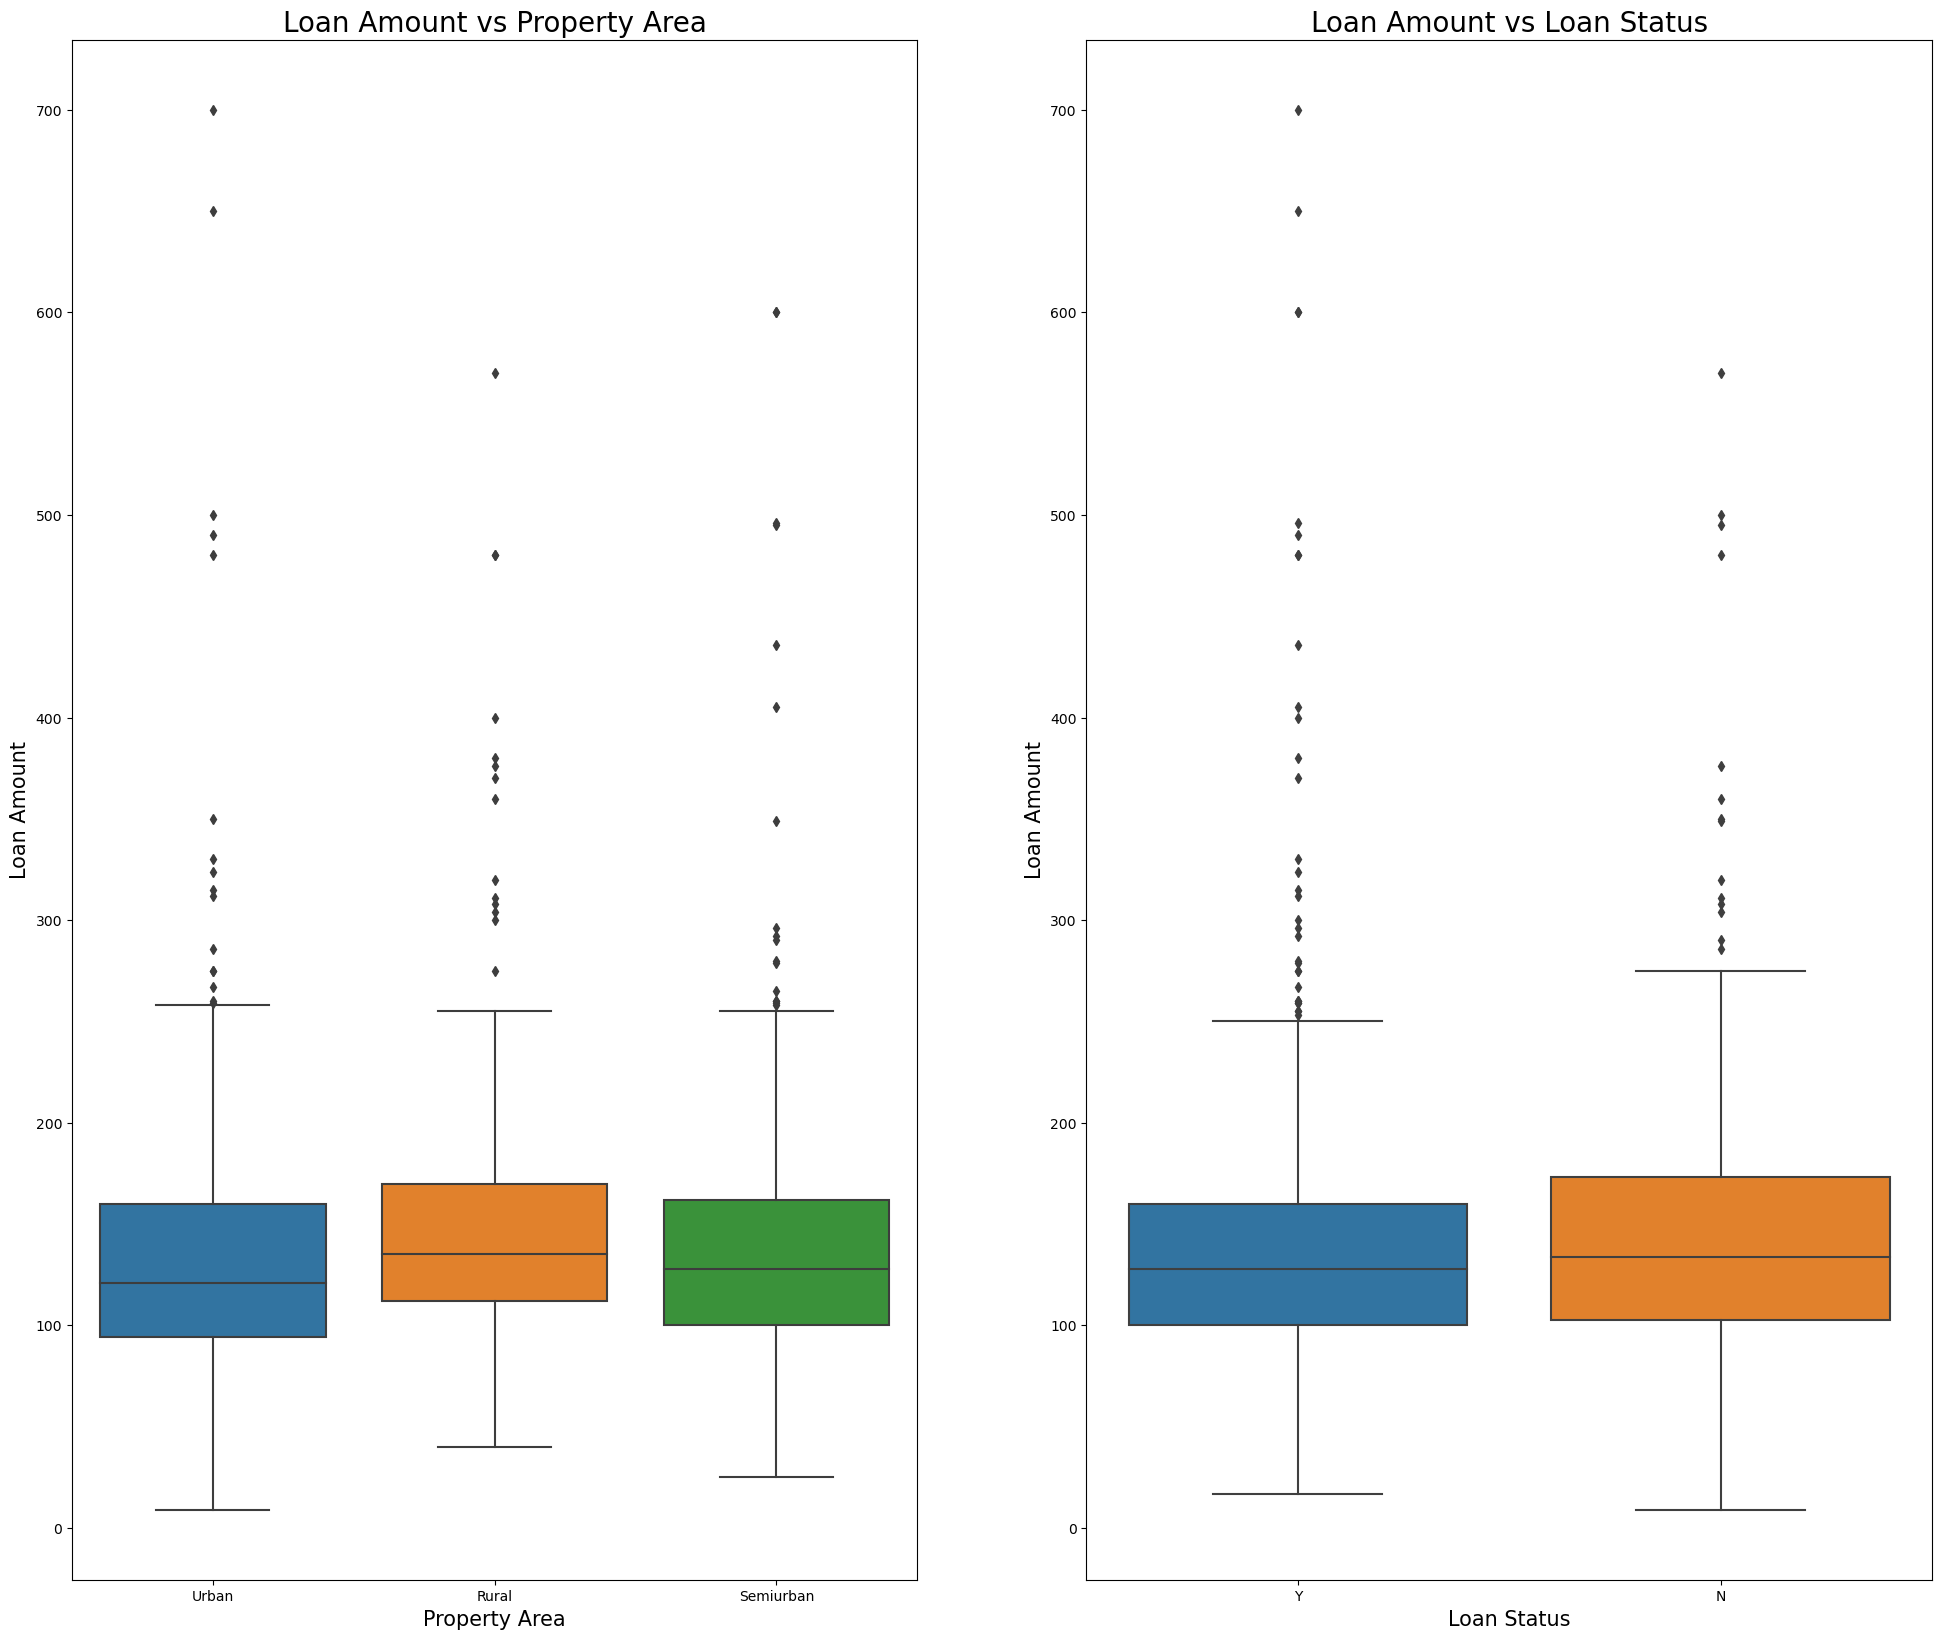

In [16]:
plt.figure(figsize=(24,20))
plt.subplot(1,2,1)
sns.boxplot(x='Property_Area',y='LoanAmount',data=df)
plt.title('Loan Amount vs Property Area',fontsize=20)
plt.xlabel('Property Area',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df)
plt.title('Loan Amount vs Loan Status',fontsize=20)
plt.xlabel('Loan Status',fontsize=15)
plt.ylabel('Loan Amount',fontsize=15)
plt.show()

Rural people apply for more loans

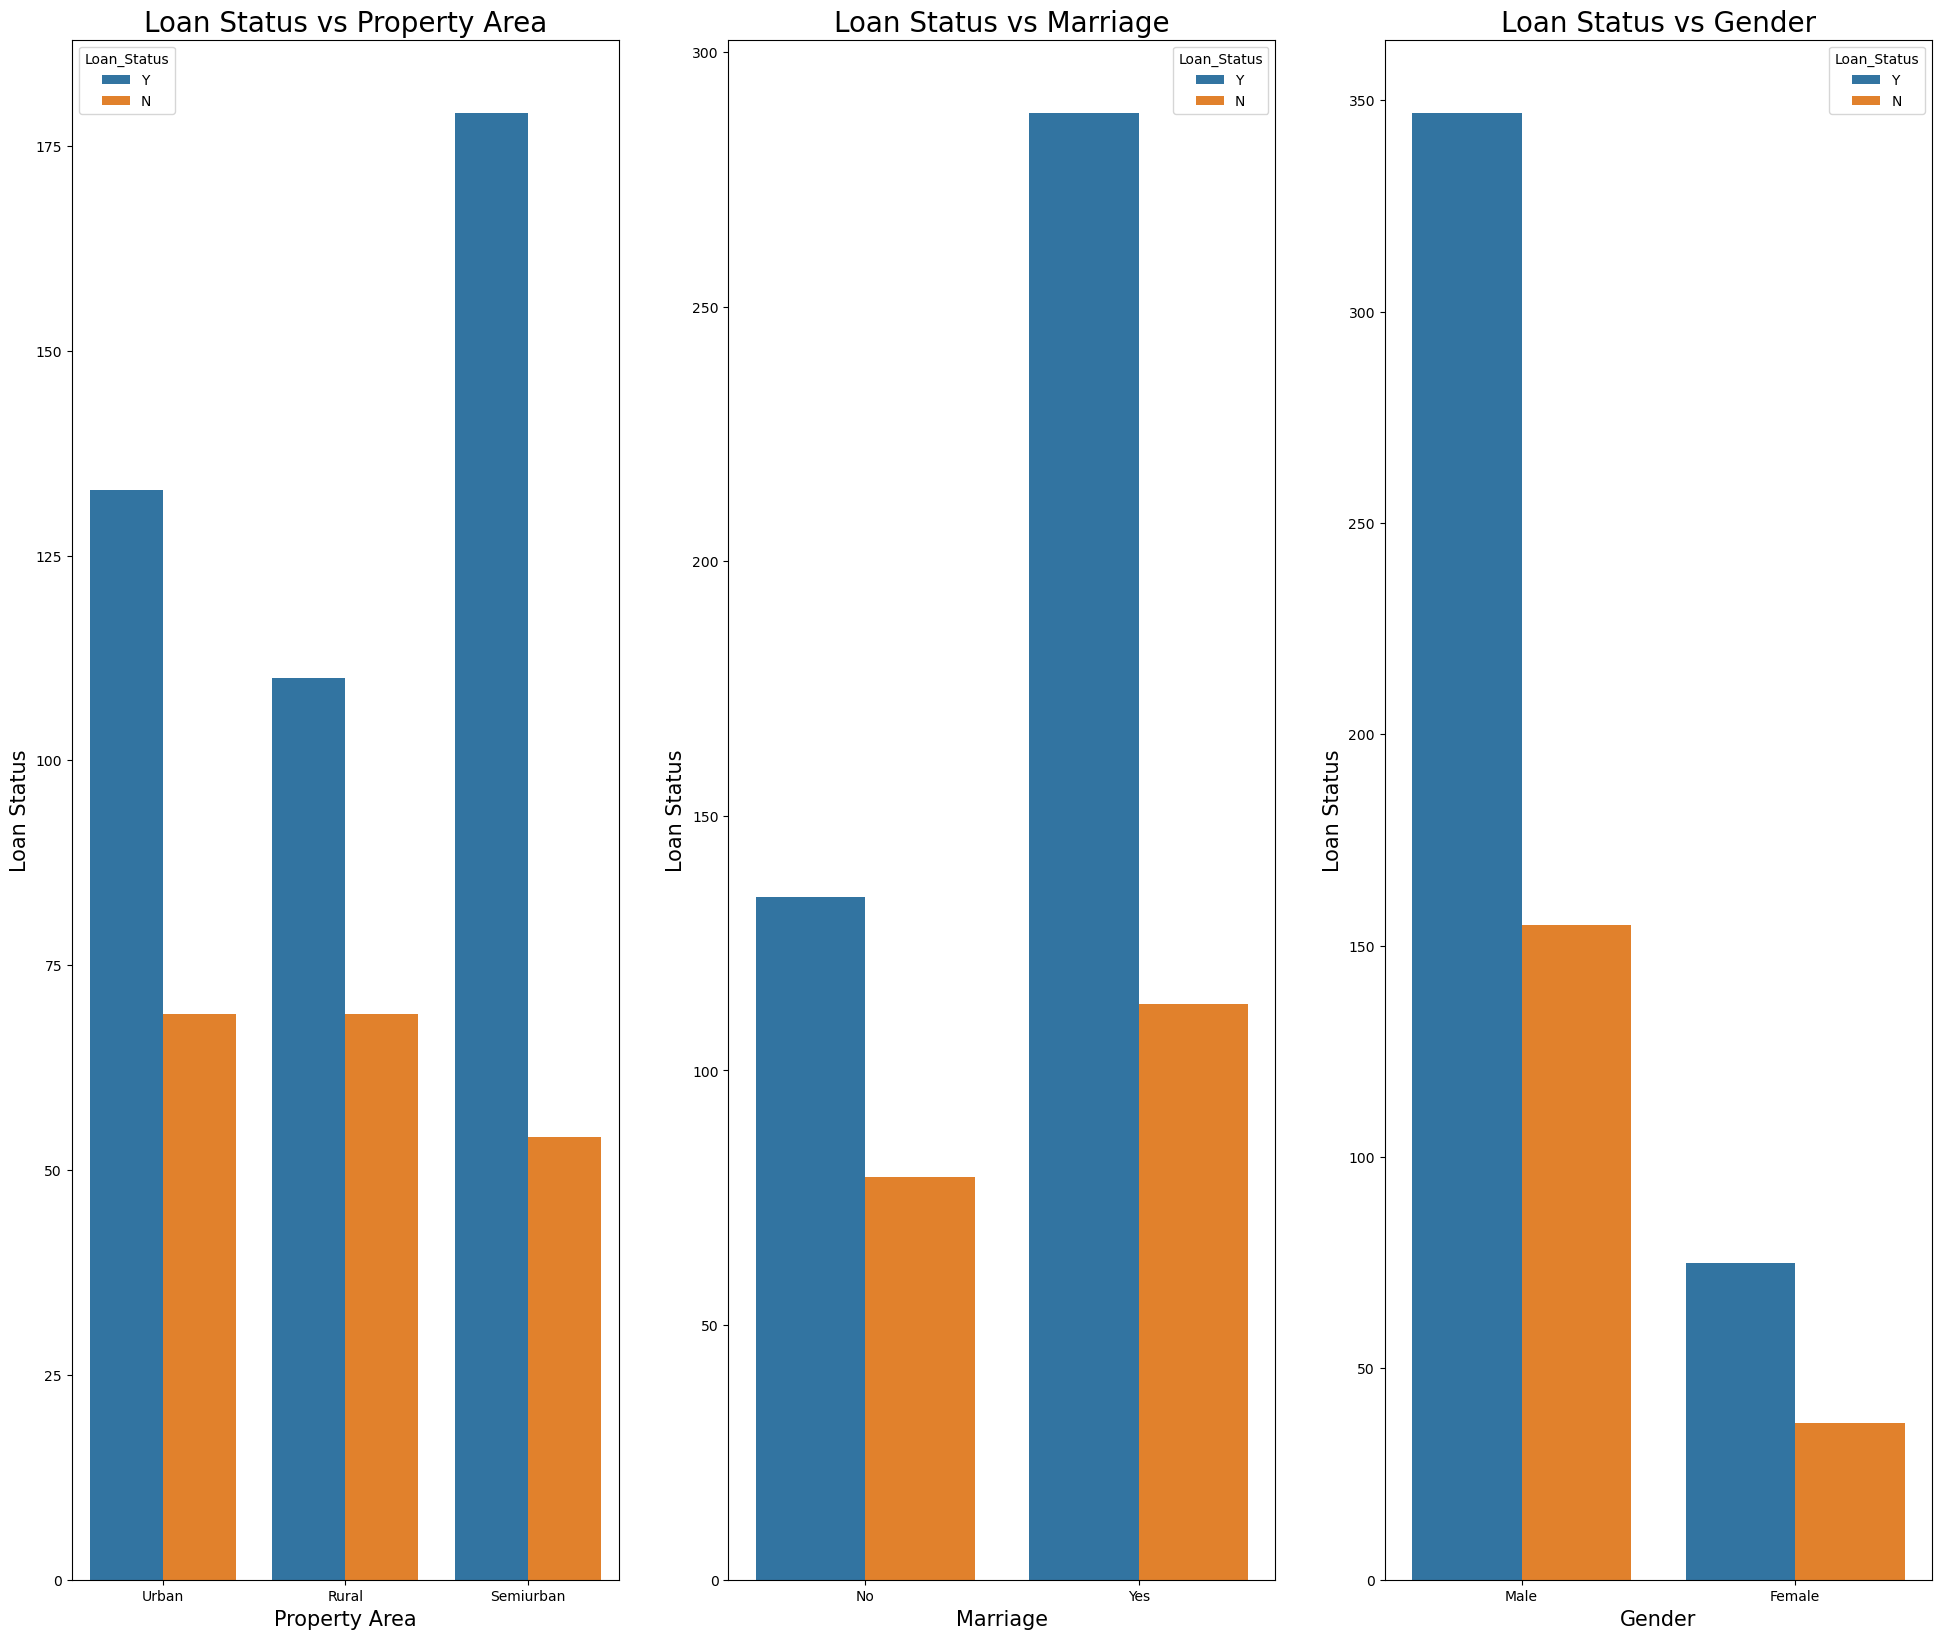

In [25]:
plt.figure(figsize=(24,20))
plt.subplot(1,3,1)
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)
plt.title('Loan Status vs Property Area',fontsize=20)
plt.xlabel('Property Area',fontsize=15)
plt.ylabel('Loan Status',fontsize=15)
plt.subplot(1,3,2)
sns.countplot(x='Married',hue='Loan_Status',data=df)
plt.title('Loan Status vs Marriage',fontsize=20)
plt.xlabel('Marriage',fontsize=15)
plt.ylabel('Loan Status',fontsize=15)
plt.subplot(1,3,3)
sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.title('Loan Status vs Gender',fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Loan Status',fontsize=15)
plt.show()

Semiurban area people get more loans compared to other property areas.
Married people get more loans.
Males get more loans.

# Preprocessing

In [26]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [28]:
# storing the Dependent Variables in X and Independent Variable in Y
x_class=df.drop(['Loan_ID','Loan_Status'],axis=1)
y_class=df['Loan_Status']
x_class_train,x_class_test,y_class_train,y_class_test=train_test_split(x_class,y_class,test_size=0.30,random_state=42)

In [29]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_class_train=mmscaler.fit_transform(x_class_train)
x_class_test=mmscaler.fit_transform(x_class_test)
x_class_train=pd.DataFrame(x_class_train)
x_class_test=pd.DataFrame(x_class_test) 

In [30]:
a_class={'Model Name':[], 'Accuracy Score':[] ,'Precision Score':[] ,'Recall Score':[] ,'F1 Score':[]}
Results_class=pd.DataFrame(a_class)
Results_class.head()

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score


In [31]:
# Create objects of Regression / Regressor models with default hyper-parameters

modellog = LogisticRegression()
modeldtc = DecisionTreeClassifier()
modelbagc = BaggingClassifier()
modelrfc = RandomForestClassifier()
# modelSVC = SVC()
modelXGC = xgb.XGBClassifier()
modelKNNC = KNeighborsClassifier(n_neighbors=5)
modelETC = ExtraTreesClassifier()

modelGBC = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [32]:
# Evalution matrix for all the algorithms

MM = [modellog, modeldtc, modelbagc, modelrfc, modelXGC, modelKNNC, modelETC,modelGBC]

for models in MM:
    print(models)
    # Fit the model with train data
    
    models.fit(x_class_train, y_class_train)
    
    # Predict the model with test data

    y_class_pred = models.predict(x_class_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Accuracy Score:', round(accuracy_score(y_class_test, y_class_pred),3))  
    print('Precision Score:', round(precision_score(y_class_test, y_class_pred,average='weighted'),3))  
    print('Recall Score:', round(recall_score(y_class_test, y_class_pred,average='weighted'),3))
    print('F1_Score:', round(f1_score(y_class_test, y_class_pred,average='weighted'),6))
#     print('Area Under Curve:', round(roc_auc_score(y_class_test, y_class_pred,multi_class='ovr'),3))
    
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Accuracy Score' : round(accuracy_score(y_class_test, y_class_pred),3),
               'Precision Score' : round(precision_score(y_class_test, y_class_pred,average='weighted'),3),
               'Recall Score' : round(recall_score(y_class_test, y_class_pred,average='weighted'),3),
               'F1 Score' : round(f1_score(y_class_test, y_class_pred,average='weighted'),6)
              }
    Results_class = Results_class.append(new_row, ignore_index=True)
    #------------------------------------------------------------

LogisticRegression()
Model Name:  LogisticRegression()
Accuracy Score: 0.784
Precision Score: 0.818
Recall Score: 0.784
F1_Score: 0.756482
------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
Model Name:  DecisionTreeClassifier()
Accuracy Score: 0.643
Precision Score: 0.643
Recall Score: 0.643
F1_Score: 0.643243
------------------------------------------------------------------------------------------------------------
BaggingClassifier()
Model Name:  BaggingClassifier()
Accuracy Score: 0.746
Precision Score: 0.739
Recall Score: 0.746
F1_Score: 0.735238
------------------------------------------------------------------------------------------------------------
RandomForestClassifier()
Model Name:  RandomForestClassifier()
Accuracy Score: 0.768
Precision Score: 0.767
Recall Score: 0.768
F1_Score: 0.75275
--------------------------------------------------------------------------------------------------------

In [33]:
models=['LogisticRegression','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier','ExtraTreesRegressor','GradientBoostingClassifier']
result_class=pd.DataFrame({'Model_Name':models})
result_class['Accuracy Score']=Results_class['Accuracy Score']
result_class['Recall Score']=Results_class['Recall Score']
result_class['Precision Score']=Results_class['Precision Score']
result_class['F1 Score']=Results_class['F1 Score']
result_class=result_class.sort_values(by='F1 Score',ascending=False).reset_index(drop=True)
result_class

,Model_Name,Accuracy Score,Recall Score,Precision Score,F1 Score
0,LogisticRegression,0.784,0.784,0.818,0.756482
1,GradientBoostingClassifier,0.773,0.773,0.780,0.753672
2,RandomForestClassifier,0.768,0.768,0.767,0.752750
3,XGBClassifier,0.746,0.746,0.740,0.741089
4,BaggingClassifier,0.746,0.746,0.739,0.735238
5,ExtraTreesRegressor,0.741,0.741,0.733,0.726933
6,KNeighborsClassifier,0.746,0.746,0.744,0.725493
7,DecisionTreeClassifier,0.643,0.643,0.643,0.643243


# Logistic Regression is the best model for classification.